# Project-2 ( COVID-19)

In [1]:
#Let's import necessary Libraries

#Data Analysis and Data Wrangling
import pandas as pd
import numpy as np

#Data Visulaziation
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Suppress warnings for clean notebook
import warnings
warnings.filterwarnings('ignore')

print("Successfully imported Libraries")

Successfully imported Libraries


In [2]:
#Let's load the data set
covid=pd.read_csv('aggregate_covid_country.csv')

In [3]:
covid.head()

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0


In [4]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23688 entries, 0 to 23687
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       23688 non-null  object
 1   Country    23688 non-null  object
 2   Confirmed  23688 non-null  int64 
 3   Recovered  23688 non-null  int64 
 4   Deaths     23688 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 925.4+ KB


In [5]:
covid['Date']=pd.to_datetime(covid['Date'])
covid['Date']

0       2020-01-22
1       2020-01-22
2       2020-01-22
3       2020-01-22
4       2020-01-22
           ...    
23683   2020-05-26
23684   2020-05-26
23685   2020-05-26
23686   2020-05-26
23687   2020-05-26
Name: Date, Length: 23688, dtype: datetime64[ns]

In [6]:
#Lets extract the year and month from the Date for better visulatization
covid['Year']=covid['Date'].dt.year
covid['Month']=covid['Date'].dt.month
covid['Day']=covid['Date'].dt.day

In [7]:
covid.columns.values

array(['Date', 'Country', 'Confirmed', 'Recovered', 'Deaths', 'Year',
       'Month', 'Day'], dtype=object)

In [8]:
columns_names=(['Date', 'Country', 'Confirmed', 'Recovered', 'Deaths', 'Year','Month', 'Day'])
columns_names

['Date', 'Country', 'Confirmed', 'Recovered', 'Deaths', 'Year', 'Month', 'Day']

In [9]:
#Let's Rearrange the columns
columns_names[0],columns_names[1],columns_names[2],columns_names[3],columns_names[4],columns_names[5],columns_names[6],columns_names[7]=columns_names[7],columns_names[6],columns_names[5],columns_names[0],columns_names[1],columns_names[2],columns_names[3],columns_names[4]

In [10]:
columns_names

['Day', 'Month', 'Year', 'Date', 'Country', 'Confirmed', 'Recovered', 'Deaths']

In [11]:
covid=covid[columns_names]
covid

,Day,Month,Year,Date,Country,Confirmed,Recovered,Deaths
0,22,1,2020,2020-01-22,Afghanistan,0,0,0
1,22,1,2020,2020-01-22,Albania,0,0,0
2,22,1,2020,2020-01-22,Algeria,0,0,0
3,22,1,2020,2020-01-22,Andorra,0,0,0
4,22,1,2020,2020-01-22,Angola,0,0,0
...,...,...,...,...,...,...,...,...
23683,26,5,2020,2020-05-26,West Bank and Gaza,429,365,3
23684,26,5,2020,2020-05-26,Western Sahara,9,6,1
23685,26,5,2020,2020-05-26,Yemen,249,10,49
23686,26,5,2020,2020-05-26,Zambia,920,336,7


In [12]:
covid_new=covid.drop(['Date'],axis=1)

In [13]:
covid_new['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guin

In [14]:
#Let's group all the repeated countries
l=covid_new.groupby('Country')
corona=l.last()

In [15]:
corona

,Day,Month,Year,Confirmed,Recovered,Deaths
Country,,,,,,
Afghanistan,26,5,2020,11831,1128,220
Albania,26,5,2020,1029,803,33
Algeria,26,5,2020,8697,4918,617
Andorra,26,5,2020,763,676,51
Angola,26,5,2020,70,18,4
...,...,...,...,...,...,...
West Bank and Gaza,26,5,2020,429,365,3
Western Sahara,26,5,2020,9,6,1
Yemen,26,5,2020,249,10,49


## Exploratory Data Analysis

In [16]:
corona

,Day,Month,Year,Confirmed,Recovered,Deaths
Country,,,,,,
Afghanistan,26,5,2020,11831,1128,220
Albania,26,5,2020,1029,803,33
Algeria,26,5,2020,8697,4918,617
Andorra,26,5,2020,763,676,51
Angola,26,5,2020,70,18,4
...,...,...,...,...,...,...
West Bank and Gaza,26,5,2020,429,365,3
Western Sahara,26,5,2020,9,6,1
Yemen,26,5,2020,249,10,49


In [17]:
#Let's check the shape of our data set
corona.shape

(188, 6)

In [18]:
corona.columns

Index(['Day', 'Month', 'Year', 'Confirmed', 'Recovered', 'Deaths'], dtype='object')

In [19]:
#Let's check for the missing values
print(corona.isnull().sum())

Day          0
Month        0
Year         0
Confirmed    0
Recovered    0
Deaths       0
dtype: int64


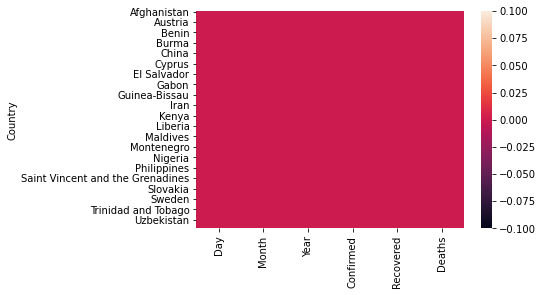

In [20]:
#Let's ceck the heat map for better visual
sns.heatmap(corona.isnull())
plt.show()

#### We can observe from the above output that the dataset has no missing values

In [21]:
#Let's begin with our EDA
corona.info()

<class 'pandas.core.frame.DataFrame'>
Index: 188 entries, Afghanistan to Zimbabwe
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Day        188 non-null    int64
 1   Month      188 non-null    int64
 2   Year       188 non-null    int64
 3   Confirmed  188 non-null    int64
 4   Recovered  188 non-null    int64
 5   Deaths     188 non-null    int64
dtypes: int64(6)
memory usage: 10.3+ KB


In [22]:
# iterate over each attribute and print values count for it
for key, value in corona.iteritems():
    print(corona[key].value_counts(), "\n")

26    188
Name: Day, dtype: int64 

5    188
Name: Month, dtype: int64 

2020    188
Name: Year, dtype: int64 

18       4
441      2
25       2
11       2
141      2
        ..
15264    1
671      1
1438     1
1504     1
11265    1
Name: Confirmed, Length: 180, dtype: int64 

18      4
15      3
14      3
6       3
71      2
       ..
5027    1
7575    1
929     1
6560    1
1792    1
Name: Recovered, Length: 171, dtype: int64 

0       20
1       10
4        7
11       4
2        4
        ..
1418     1
149      1
172      1
411      1
886      1
Name: Deaths, Length: 114, dtype: int64 



In [23]:
#let's check the correlation in the data set
corona.corr()
corona.corr().style.background_gradient(cmap='coolwarm')

,Day,Month,Year,Confirmed,Recovered,Deaths
Day,nan,nan,nan,nan,nan,nan
Month,nan,nan,nan,nan,nan,nan
Year,nan,nan,nan,nan,nan,nan
Confirmed,nan,nan,nan,1.000000,0.895985,0.934197
Recovered,nan,nan,nan,0.895985,1.000000,0.836431
Deaths,nan,nan,nan,0.934197,0.836431,1.000000


#### We can see from the above output that confirmed covid cases and recovered cases are highly correlated

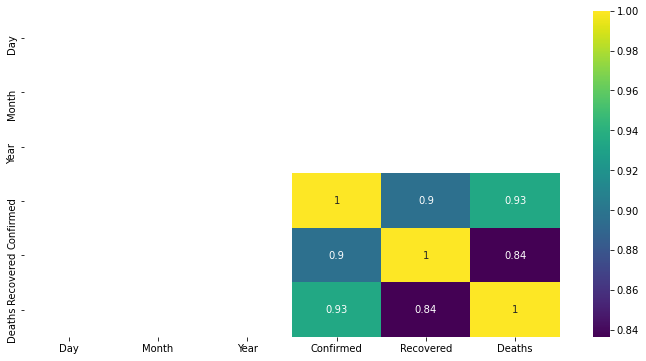

In [24]:
# Let's see the correlation 
plt.figure(figsize=(12,6))
sns.heatmap(corona.corr(),annot=True,cmap='viridis');

#### We can observe that confirmed cases and recovered cases have very good corelation

In [25]:
#Let's check the stats metrix 
corona.describe().T

,count,mean,std,min,25%,50%,75%,max
Day,188.0,26.000000,0.000000,26.0,26.00,26.0,26.00,26.0
Month,188.0,5.000000,0.000000,5.0,5.00,5.0,5.00,5.0
Year,188.0,2020.000000,0.000000,2020.0,2020.00,2020.0,2020.00,2020.0
Confirmed,188.0,29732.053191,133536.830203,2.0,326.25,1486.5,11310.50,1680913.0
Recovered,188.0,12164.659574,39401.499530,0.0,123.50,700.5,5045.25,384902.0
Deaths,188.0,1864.111702,8727.269211,0.0,6.00,34.5,267.50,98913.0


#### From the above table we can observe that:
    Minimum confirmed case is 2 and maximum confirmed cases are 1.6 million cases.
    Minimum recovered and Death cases is 0 because in some countries they are still active cases and no one has recovered or dead. It is also possible there is limitation due to the data collection 
    There are some outlier in the revored and death cases beacuse the 75% and maximum values have huge differnce. 

In [26]:
corona.style.background_gradient(cmap='Reds')

,Day,Month,Year,Confirmed,Recovered,Deaths
Country,,,,,,
Afghanistan,26,5,2020,11831,1128,220
Albania,26,5,2020,1029,803,33
Algeria,26,5,2020,8697,4918,617
Andorra,26,5,2020,763,676,51
Angola,26,5,2020,70,18,4
Antigua and Barbuda,26,5,2020,25,19,3
Argentina,26,5,2020,13228,4167,484
Armenia,26,5,2020,7402,3220,91
Australia,26,5,2020,7139,6560,103


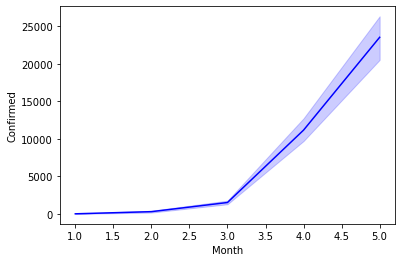

In [27]:
sns.lineplot(x="Month",y="Confirmed",data=covid_new,color="b");

#### From the above graph we can easily observe that the number of confirmed cases has dractically increased form the month of march

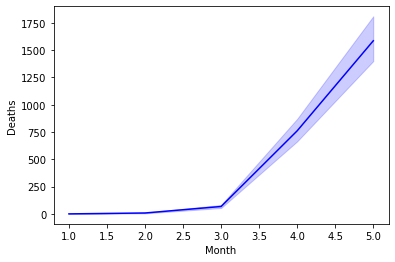

In [28]:
sns.lineplot(x="Month",y="Deaths",data=covid_new,color="b");

#### From the above graph we can easily observe that the number of Deaths has dractically increased form the month of march

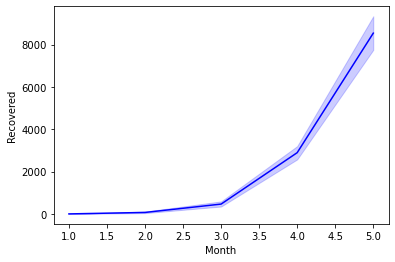

In [29]:
sns.lineplot(x="Month",y="Recovered",data=covid_new,color="b")

#### From the above graph we can easily observe that the number of Recovered cases have a slow progress from march till mid april and then they have rapidly increased. It means that the recovery rate have increased and the death rates have gone down

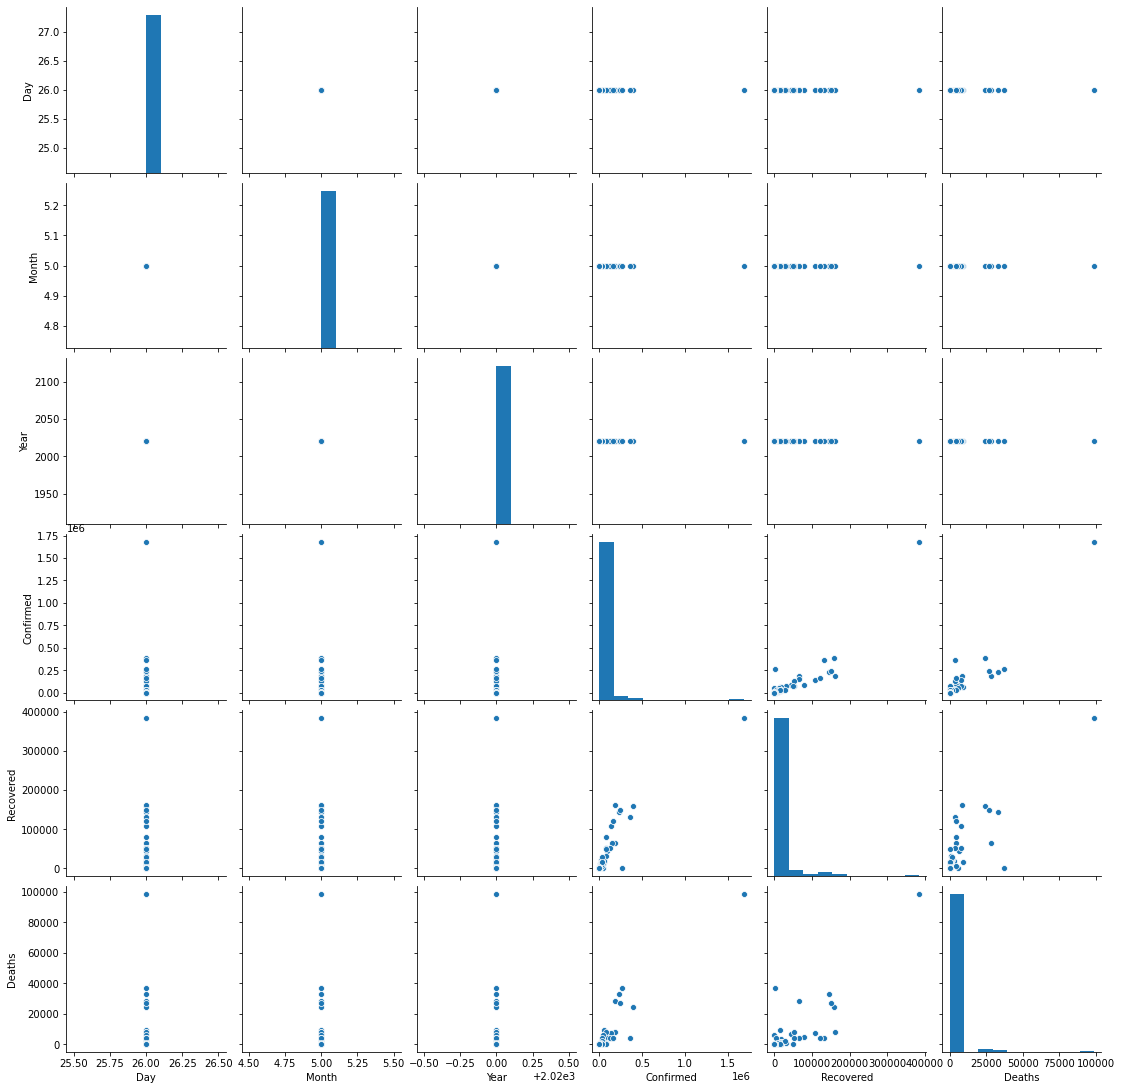

In [30]:
#Let's see the visual charaterstics of the data
sns.pairplot(corona);

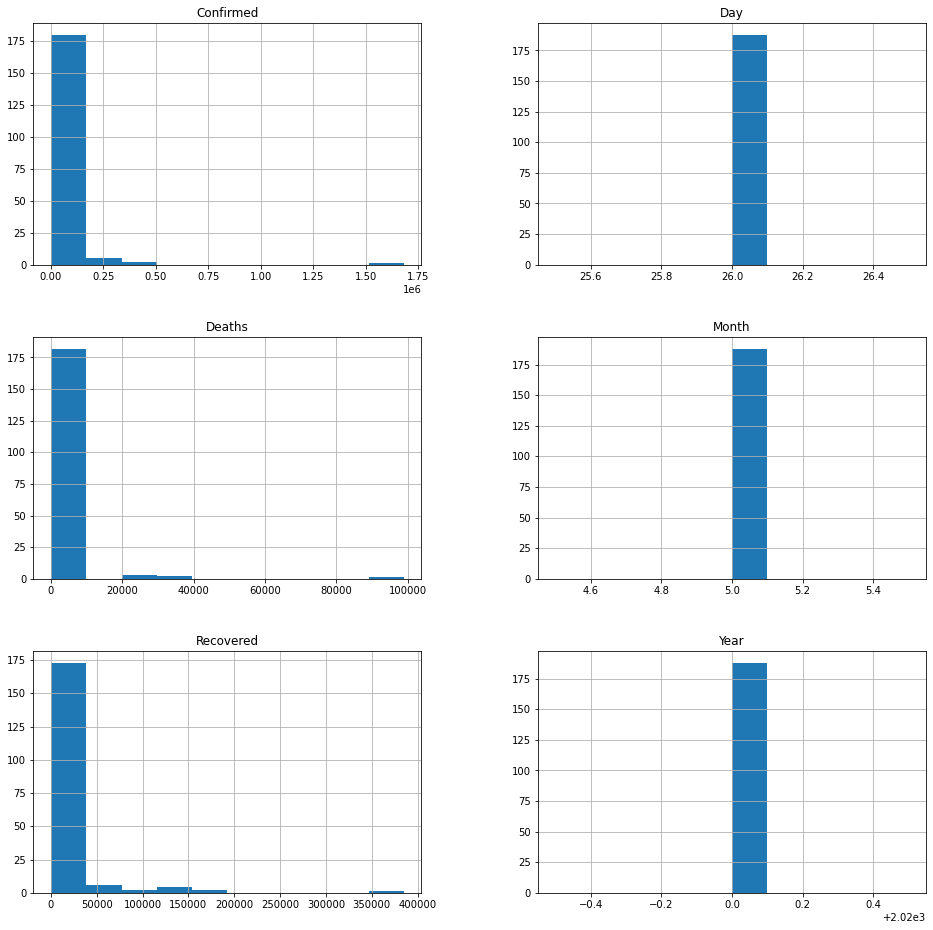

In [31]:
corona.hist(figsize=(16,16));

#### From the above graph od Confirmed case, recovered and death are skewed towards right side

(array([-25.,   0.,  25.,  50.,  75., 100., 125., 150., 175., 200.]),
 <a list of 10 Text major ticklabel objects>)

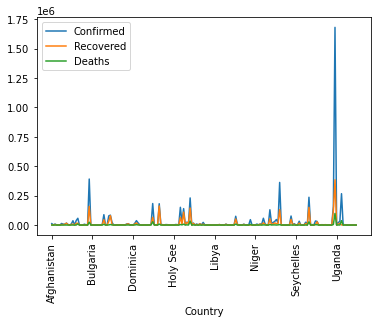

In [32]:
covid_plot = corona.loc[:,["Confirmed","Recovered", "Deaths"]]
covid_plot.plot();
plt.xticks(rotation=90)

#### We can observe that in Uganda have huge numers of cofi4red cases as compared to other countries

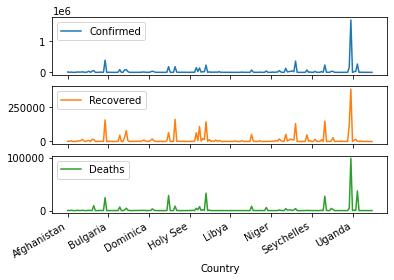

In [33]:
covid_plot.plot(subplots=True);

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

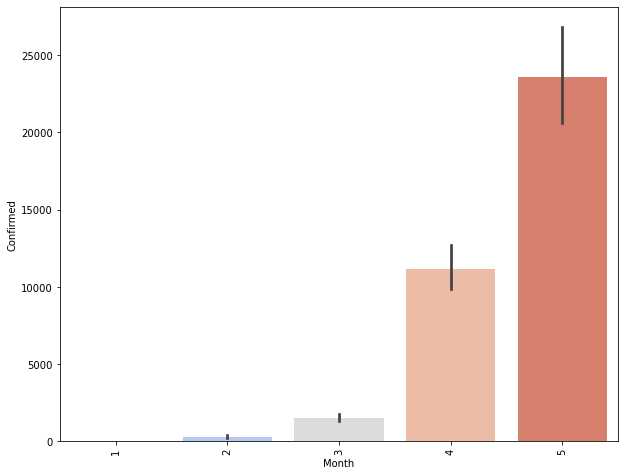

In [34]:
fig=plt.figure(figsize=(10,8))
sns.barplot(x='Month',y='Confirmed',data=covid_new, palette='coolwarm');
plt.rcParams.update({'font.size': 12});
plt.xticks(rotation=90)

#### From the above graph we can see that the number of confirmed cases keep on increasing as compared from Jan to May month

[Text(0, 0, '0'),
 Text(0, 0, '200000'),
 Text(0, 0, '400000'),
 Text(0, 0, '600000'),
 Text(0, 0, '800000'),
 Text(0, 0, '1000000'),
 Text(0, 0, '1200000'),
 Text(0, 0, '1400000'),
 Text(0, 0, '1600000'),
 Text(0, 0, '1800000')]

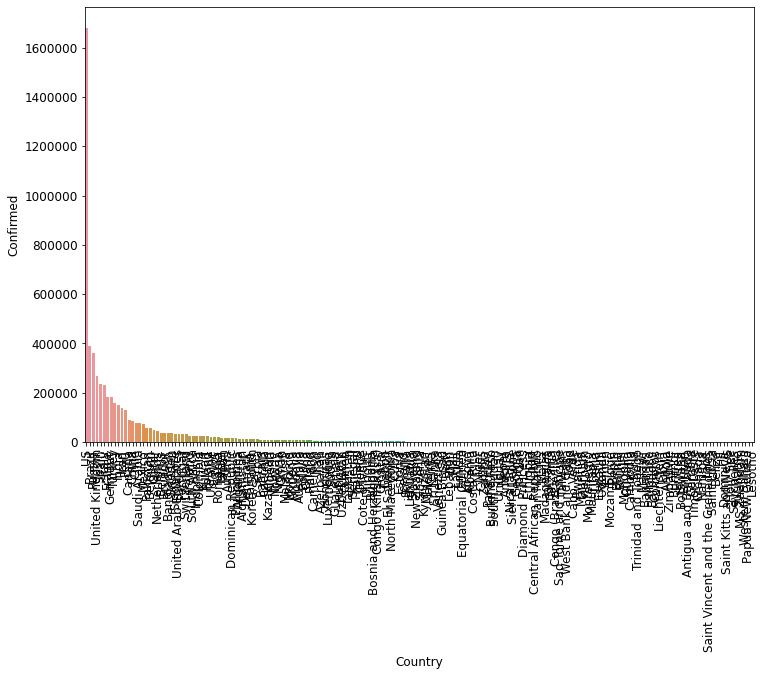

In [35]:
fig ,ax = plt.subplots(figsize= (12,8))
fig.set_facecolor("white")
corona = corona.sort_values("Confirmed",ascending=False);
p = sns.barplot(ax=ax,x= corona.index,y=corona['Confirmed'])
p.set_xticklabels(labels = corona.index,rotation=90)

p.set_yticklabels(labels=(p.get_yticks()*1).astype(int))

(array([-20000.,      0.,  20000.,  40000.,  60000.,  80000., 100000.,
        120000.]),
 <a list of 8 Text major ticklabel objects>)

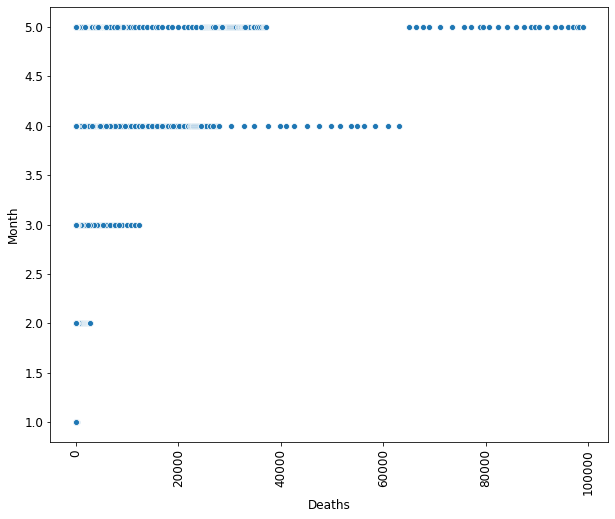

In [36]:
fig=plt.figure(figsize=(10,8))
sns.scatterplot(x='Deaths',y='Month',data=covid_new, palette='coolwarm');
plt.rcParams.update({'font.size': 12})
plt.xticks(rotation=90)

#### We can observe that the number of death have rapidly increased from the mid april month

(array([-250000.,       0.,  250000.,  500000.,  750000., 1000000.,
        1250000., 1500000., 1750000., 2000000.]),
 <a list of 10 Text major ticklabel objects>)

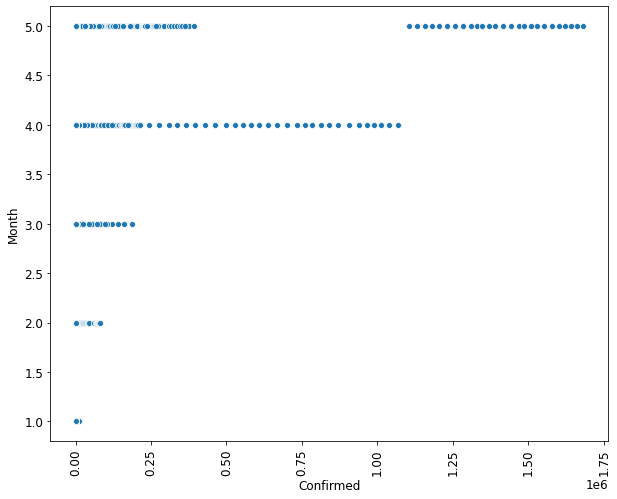

In [37]:
fig=plt.figure(figsize=(10,8))
sns.scatterplot(x='Confirmed',y='Month',data=covid_new, palette='coolwarm');
plt.rcParams.update({'font.size': 12})
plt.xticks(rotation=90)

In [38]:
#Let;s label our dataset
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
mappings=list()

for column in range(len(corona.columns)):
    corona[corona.columns[column]]=le.fit_transform(corona[corona.columns[column]])
    mappings_dict={index: label for index, label in enumerate(le.classes_)}
    mappings.append(mappings_dict)

In [39]:
mappings

[{0: 26},
 {0: 5},
 {0: 2020},
 {0: 2,
  1: 8,
  2: 9,
  3: 11,
  4: 12,
  5: 15,
  6: 16,
  7: 18,
  8: 19,
  9: 21,
  10: 23,
  11: 24,
  12: 25,
  13: 27,
  14: 35,
  15: 39,
  16: 42,
  17: 56,
  18: 70,
  19: 77,
  20: 82,
  21: 87,
  22: 92,
  23: 98,
  24: 100,
  25: 101,
  26: 116,
  27: 121,
  28: 124,
  29: 139,
  30: 141,
  31: 206,
  32: 208,
  33: 213,
  34: 249,
  35: 253,
  36: 261,
  37: 266,
  38: 268,
  39: 324,
  40: 327,
  41: 334,
  42: 339,
  43: 390,
  44: 391,
  45: 429,
  46: 441,
  47: 487,
  48: 509,
  49: 564,
  50: 586,
  51: 611,
  52: 666,
  53: 671,
  54: 700,
  55: 701,
  56: 712,
  57: 718,
  58: 732,
  59: 754,
  60: 759,
  61: 763,
  62: 772,
  63: 789,
  64: 806,
  65: 832,
  66: 877,
  67: 920,
  68: 939,
  69: 952,
  70: 956,
  71: 1029,
  72: 1038,
  73: 1043,
  74: 1051,
  75: 1053,
  76: 1077,
  77: 1140,
  78: 1174,
  79: 1178,
  80: 1211,
  81: 1319,
  82: 1348,
  83: 1438,
  84: 1468,
  85: 1469,
  86: 1504,
  87: 1513,
  88: 1639,
  89: 171

In [40]:
corona.head()

,Day,Month,Year,Confirmed,Recovered,Deaths
Country,,,,,,
US,0,0,0,179,170,113
Brazil,0,0,0,178,168,108
Russia,0,0,0,177,165,97
United Kingdom,0,0,0,176,88,112
Spain,0,0,0,175,167,109


In [41]:
corona.info()

<class 'pandas.core.frame.DataFrame'>
Index: 188 entries, US to Lesotho
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Day        188 non-null    int64
 1   Month      188 non-null    int64
 2   Year       188 non-null    int64
 3   Confirmed  188 non-null    int64
 4   Recovered  188 non-null    int64
 5   Deaths     188 non-null    int64
dtypes: int64(6)
memory usage: 15.3+ KB


In [42]:
corona.skew()

Day          0.000000
Month        0.000000
Year         0.000000
Confirmed    0.048129
Recovered    0.119090
Deaths       0.656157
dtype: float64

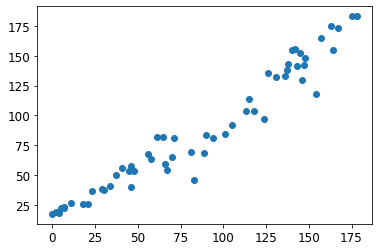

In [43]:
#Let's split the data into 'x' independent and 'y' dependent variables
x = corona.drop(['Confirmed'],axis=1)
y = corona['Confirmed']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train,y_train)
predictions=lm.predict(x_test)
plt.scatter(y_test,predictions);

In [44]:
#Checking how well the predictions are
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 11.281378333515287
MSE: 181.6479132085286
RMSE: 13.477682041379689


In [45]:
#Let' improve our model
#First let's scle our model
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [46]:
#Using different models
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.linear_model import SGDRegressor
from sklearn.svm import LinearSVR
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

classifiers = [
    SGDRegressor(max_iter=100000),
    LinearSVR(max_iter=100000),
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
]

In [47]:
#Evaluating scores by cross-validation
from sklearn.model_selection import cross_val_score
for clf in classifiers:
    clf.fit(x_train, y_train)
    name = clf.__class__.__name__
    print("="*30)
    print(name)
    scores = cross_val_score(clf, x_train, y_train, scoring="neg_mean_squared_error", cv=10)
    rmse_scores = np.sqrt(-scores)
    print("Mean: ", scores.mean())
    print("Std deviation: ", scores.std())
    
print("="*30)

SGDRegressor
Mean:  -276.1033509366988
Std deviation:  115.24067868760429
LinearSVR
Mean:  -436.7733044591735
Std deviation:  191.72498851441847
LinearRegression
Mean:  -276.88151419142287
Std deviation:  115.75654526964817
DecisionTreeRegressor
Mean:  -414.57499999999993
Std deviation:  238.44854112376794
RandomForestRegressor
Mean:  -250.12967682411696
Std deviation:  112.30738379924524


In [48]:
#We will use Grid Search to get best settings(estimator) for Random Forest Regression
from sklearn.model_selection import GridSearchCV
#param_grid is for our settings lets see what fits the best
param_grid = [
    {'n_estimators': [3, 10, 30,50,100,200,300]},
      ]
rnd_reg = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rnd_reg, param_grid, cv=10,scoring="neg_mean_squared_error",
                          return_train_score=True)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'n_estimators': [3, 10, 30, 50, 100, 200, 300]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [49]:
grid_search.best_params_

{'n_estimators': 300}

In [50]:
#Predictions on best Parameters
best_reg = grid_search.best_estimator_
y_pred = best_reg.predict(x_test)
final_mse = mean_squared_error(y_test, y_pred)
final_mae=mean_absolute_error(y_test, y_pred)
final_rmse = np.sqrt(final_mse)
print("Final MAE:",final_mae)
print("Final MSE:",final_mse)
print("Final RMSE:",final_rmse)

Final MAE: 9.601822612085769
Final MSE: 149.2156622136934
Final RMSE: 12.215386289990727


In [51]:
#Our Initial Predictions
print('Initial MAE:', metrics.mean_absolute_error(y_test, predictions))
print('Initial MSE:', metrics.mean_squared_error(y_test, predictions))
print('Initial RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Initial MAE: 11.281378333515287
Initial MSE: 181.6479132085286
Initial RMSE: 13.477682041379689


In [52]:
#Our new model Performs much better 
print('Reduced MAE:',(metrics.mean_absolute_error(y_test, predictions))-final_mae)
print('Reduced MSE:',(metrics.mean_squared_error(y_test, predictions))-final_mse)
print('Reduced RMSE:',np.sqrt(metrics.mean_squared_error(y_test, predictions))-final_rmse)

Reduced MAE: 1.6795557214295176
Reduced MSE: 32.43225099483519
Reduced RMSE: 1.2622957513889617


In [53]:
print("Our original model mean: ",corona['Confirmed'].mean())
print("Our proposed model mean: ",predictions.mean())

Our original model mean:  86.29787234042553
Our proposed model mean:  88.04024938766537


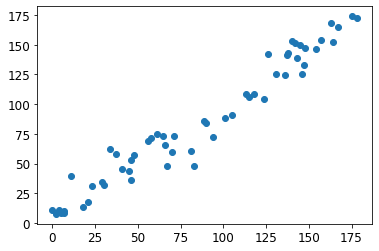

In [54]:
#lets make a scatter plot for our new model
plt.scatter(y_test,y_pred);

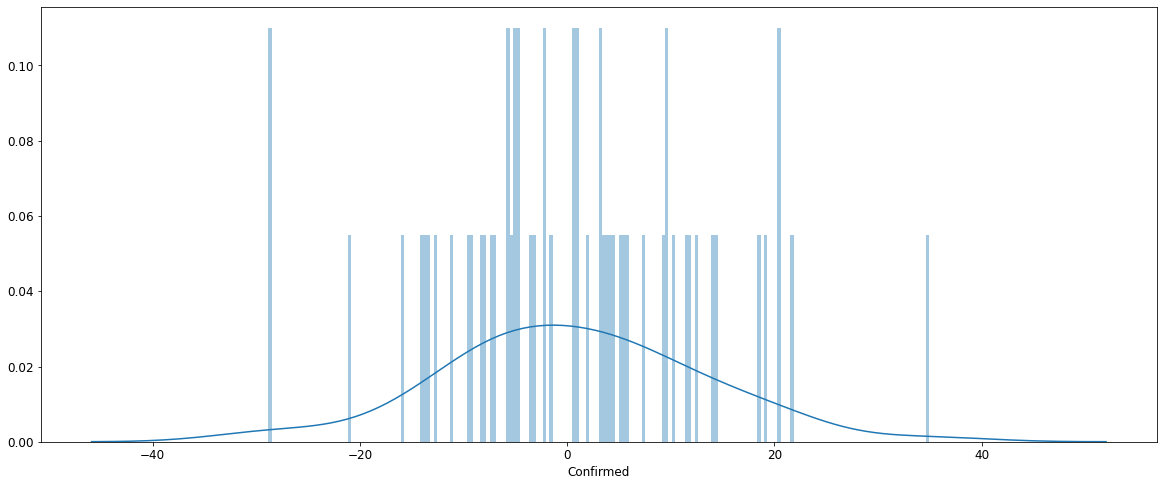

In [55]:
plt.figure(figsize=(20,8))
sns.distplot((y_test-y_pred),bins=200);